--- Arquivo Original (DRE ANUAL) ---
                               Ano Vigente      2019      2018      2017  \
0  Receita Líquida de Vendas e/ou Serviços  19886309  15590444  11984250   
1     Custo de Bens e/ou Serviços Vendidos -14332350 -11053022  -8378239   
2                          Resultado Bruto   5553961   4537422   3606011   
3                      Despesas Com Vendas  -3444112  -2747447  -2119953   
4        Despesas Gerais e Administrativas  -1188562   -759833   -679085   

      2016     2015     2014      2013     2012     2011  
0  9508746  8978259  9779385  22172922  7665112  6419371  
1 -6586130 -6399630 -7086909 -15247125 -5146597 -4275084  
2  2922615  2578629  2692476   6925797  2518515  2144287  
3 -1776258 -1720799 -1746258  -4365789 -1581049 -1270971  
4  -615545  -584280  -556882  -1429211  -481965  -441566  
------------------------------------------
--- Arquivo Original (balanço patrimonial anual) ---
                               Ano Vigente      2019   

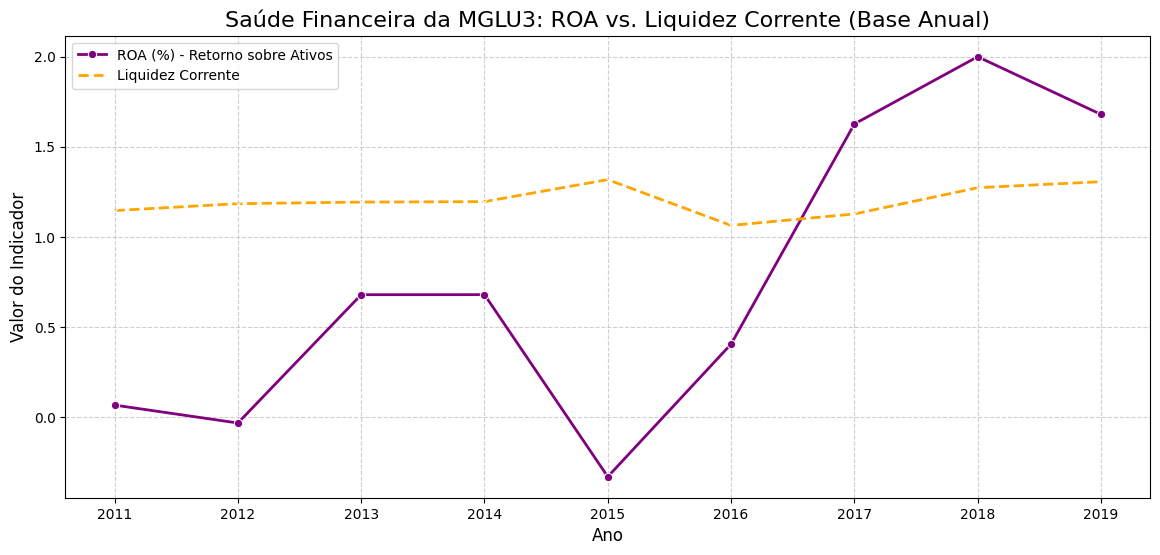

In [2]:
# IMPORTAÇÃO DE BIBLIOTECAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Define o caminho base de onde o script está
# Usando Path.cwd() ou o caminho relativo
PASTA_DATA = Path('../Data')

# DRE ANUAL
ARQUIVO_DRE_ANUAL = PASTA_DATA / 'balanco_magazine luiza (tratado) - dem. resultados anual.csv'
df_dre_anual = pd.read_csv(ARQUIVO_DRE_ANUAL)
print("--- Arquivo Original (DRE ANUAL) ---")
print(df_dre_anual.head())
print("------------------------------------------")

# BALANÇO PATRIMONIAL ANUAL
ARQUIVO_BP_ANUAL = PASTA_DATA / 'balanco_magazine luiza (tratado) - balanço patrimonial anual.csv'
df_bp_anual = pd.read_csv(ARQUIVO_BP_ANUAL)
print("--- Arquivo Original (balanço patrimonial anual) ---")
print(df_dre_anual.head())
print("------------------------------------------")

print("Arquivos DRE e Balanço Patrimonial Anual carregados com sucesso.")

# TRANSPOR PARA QUE OS ANOS (COLUNAS) VIREM LINHAS
df_dre_t = df_dre_anual.set_index(df_dre_anual.columns[0]).T.reset_index()
df_dre_t.rename(columns={'index': 'Ano'}, inplace=True)

# CONTAS CHAVE NA DRE
NOME_RECEITA_LIQUIDA = 'Receita Líquida de Vendas e/ou Serviços'
NOME_RESULTADO_BRUTO = 'Resultado Bruto'
NOME_LUCRO_LIQUIDO = 'Lucro/Prejuízo do Período'

# COLUNAS DE INTERESSE
df_dre_final = df_dre_t[['Ano', NOME_RECEITA_LIQUIDA, NOME_RESULTADO_BRUTO, NOME_LUCRO_LIQUIDO]].copy()
df_dre_final.columns = ['Ano', 'Receita_Liq', 'Resultado_Bruto', 'Lucro_Liquido']


# CONVERTER ANO PARA NUMÉRICO
df_dre_final['Ano'] = pd.to_numeric(df_dre_final['Ano'], errors='coerce', downcast='integer')

for col in ['Receita_Liq', 'Resultado_Bruto', 'Lucro_Liquido']:
    df_dre_final[col] = pd.to_numeric(df_dre_final[col], errors='coerce')

# TRANSPOR PARA QUE AS DATAS (COLUNAS) VIREM LINHAS
df_bp_t = df_bp_anual.set_index(df_bp_anual.columns[0]).T.reset_index()
df_bp_t.rename(columns={'index': 'Ano'}, inplace=True) 

# CONTAS CHAVE NO BP
NOME_ATIVO_TOTAL = 'Ativo Total'
NOME_ATIVO_CIRCULANTE = 'Ativo Circulante'
NOME_PASSIVO_CIRCULANTE = 'Passivo Circulante'
NOME_PATRIMONIO_LIQUIDO = 'Patrimônio Líquido' 


# COLUNAS DE INTERESSE
df_bp_final = df_bp_t[['Ano', NOME_ATIVO_TOTAL, NOME_ATIVO_CIRCULANTE, NOME_PASSIVO_CIRCULANTE, NOME_PATRIMONIO_LIQUIDO]].copy()
df_bp_final.columns = ['Ano', 'Ativo_Total', 'Ativo_Circulante', 'Passivo_Circulante', 'Patrimonio_Liquido']
df_bp_final['Ano'] = pd.to_numeric(df_bp_final['Ano'], errors='coerce', downcast='integer')


# TRATAR OS DADOS COMO NUMÉRICOS
for col in ['Ativo_Total', 'Ativo_Circulante', 'Passivo_Circulante', 'Patrimonio_Liquido']:
    df_bp_final[col] = pd.to_numeric(df_bp_final[col], errors='coerce')
df_saude_financeira = pd.merge(df_dre_final, df_bp_final, on='Ano', how='inner')
df_saude_financeira.dropna(subset=['Receita_Liq', 'Ativo_Total'], inplace=True)

print("\nRelacionamento DRE + BP concluído. Calculando Indicadores...")

# INDICADORES DE RENTABILIDADE
df_saude_financeira['Margem_Bruta'] = (df_saude_financeira['Resultado_Bruto'] / df_saude_financeira['Receita_Liq']) * 100
df_saude_financeira['ROA'] = (df_saude_financeira['Lucro_Liquido'] / df_saude_financeira['Ativo_Total']) * 100
df_saude_financeira['ROE'] = (df_saude_financeira['Lucro_Liquido'] / df_saude_financeira['Patrimonio_Liquido']) * 100


# INDICADORES DE EFICIÊNCIA
df_saude_financeira['Giro_Ativo'] = df_saude_financeira['Receita_Liq'] / df_saude_financeira['Ativo_Total']

# INDICADORES DE LIQUIDEZ
df_saude_financeira['Liquidez_Corrente'] = df_saude_financeira['Ativo_Circulante'] / df_saude_financeira['Passivo_Circulante']

print("\nIndicadores calculados. Amostra da Tabela de Saúde Financeira:")
print(df_saude_financeira[['Ano', 'Margem_Bruta', 'ROA', 'ROE', 'Giro_Ativo', 'Liquidez_Corrente']].tail())

# VISUALIZAÇÃO

plt.figure(figsize=(14, 6))
# PLOTAR ROA
sns.lineplot(x='Ano', y='ROA', data=df_saude_financeira, label='ROA (%) - Retorno sobre Ativos', color='purple', linewidth=2, marker='o')
# PLOTAR LIQUIDEZ CORRENTE
sns.lineplot(x='Ano', y='Liquidez_Corrente', data=df_saude_financeira, label='Liquidez Corrente', color='orange', linestyle='--', linewidth=2, marker='x')


plt.title('Saúde Financeira da MGLU3: ROA vs. Liquidez Corrente (Base Anual)', fontsize=16)
plt.ylabel('Valor do Indicador', fontsize=12)
plt.xlabel('Ano', fontsize=12)
plt.xticks(df_saude_financeira['Ano'].unique())
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()
